In [13]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
#sets the default size of Matplotlib figures to 12 inches wide by 8 inches tall.
matplotlib.rcParams['figure.figsize']=(12,8)
 
# read in the data from csv file 
df = pd.read_csv(r'C:\Users\hmllb\Downloads\movies.csv')

# delete all missing data (null data) from a DataFrame. 
# The dropna() method removes any row that contains at least one null value by default.
df = df.dropna()

#change display settings (show all rows)
pd.set_option('display.max_rows', None)



In [14]:
# basic look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# way to check if there is any missing data (null value)
# 1. 
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_data))
print('\n')
# 2.
for col in df.columns:
    print(df[col].isnull().value_counts(), " \n------------------ \n")
# 3.
df.isnull().sum() 

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


False    5421
Name: name, dtype: int64  
------------------ 

False    5421
Name: rating, dtype: int64  
------------------ 

False    5421
Name: genre, dtype: int64  
------------------ 

False    5421
Name: year, dtype: int64  
------------------ 

False    5421
Name: released, dtype: int64  
------------------ 

False    5421
Name: score, dtype: int64  
------------------ 

False    5421
Name: votes, dtype: int64  
------------------ 

False    5421
Name: director, dtype: int64  
------------------ 

False    5421
Name: writer, dtype: int64  
------------------ 

False    5421
Name: star, dtype: int64  
------------------ 

False    5421
Name: country, dtype: int64  
------------------ 

False    5421
Name: budget, dtype: int64  
------------------ 

False    5421
Name: gross, 

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [16]:
# other way to check if there is any missing data (NaN value)
# nan = null
any_missing = df.isna().any()
missing_rows_company = df.loc[df['company'].isna()]
missing_rows_count = df['company'].isna().sum()
missing_rows_count
print("---------------------------------------------")
missing_rows_company




---------------------------------------------


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [6]:
#data types for columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [17]:
#change dtype of columns

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
df['votes']= df['votes'].astype('int64')
df['runtime']= df['runtime'].astype('int64')

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object


In [18]:
#create correct year release (based on column "release")
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [19]:
#sorting data by value in "gross" column
df.sort_values(by=['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<Axes: >

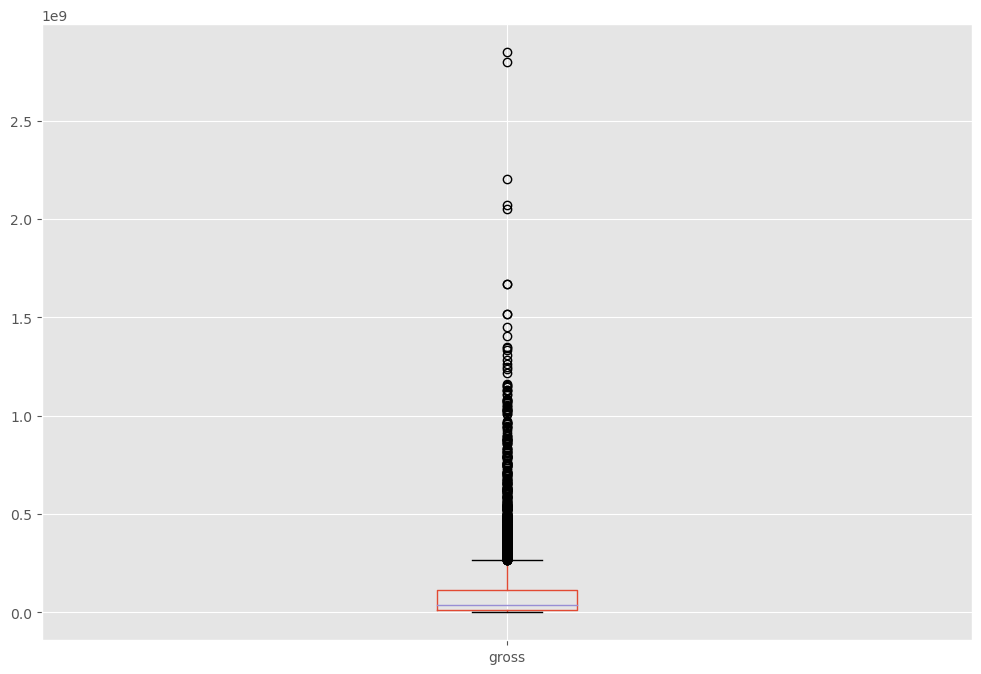

In [20]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [10]:
# Order data a little bit to see
df.sort_values(['company'],ascending = False).head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7129,47 Meters Down,PG-13,Adventure,2017,"June 16, 2017 (United States)",5.7,51000.0,Johannes Roberts,Johannes Roberts,Mandy Moore,United Kingdom,5300000.0,62198461.0,thefyzz,89.0,2017
5664,Incendies,R,Drama,2010,"January 12, 2011 (France)",8.3,158000.0,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000.0,7099598.0,micro_scope,131.0,2011
4007,The Deep End,R,Crime,2001,"August 31, 2001 (United States)",6.6,11000.0,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000.0,10031529.0,i5 Films,101.0,2001
6793,Dope,R,Adventure,2015,"June 19, 2015 (United States)",7.2,82000.0,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000.0,17986781.0,i am OTHER,103.0,2015
6420,Upstream Color,Not Rated,Drama,2013,"August 30, 2013 (United Kingdom)",6.7,32000.0,Shane Carruth,Shane Carruth,Amy Seimetz,United States,50000.0,587174.0,erbp,96.0,2013


In [11]:
#drop any duplicates if exist 
df['company']= df['company'].drop_duplicates()

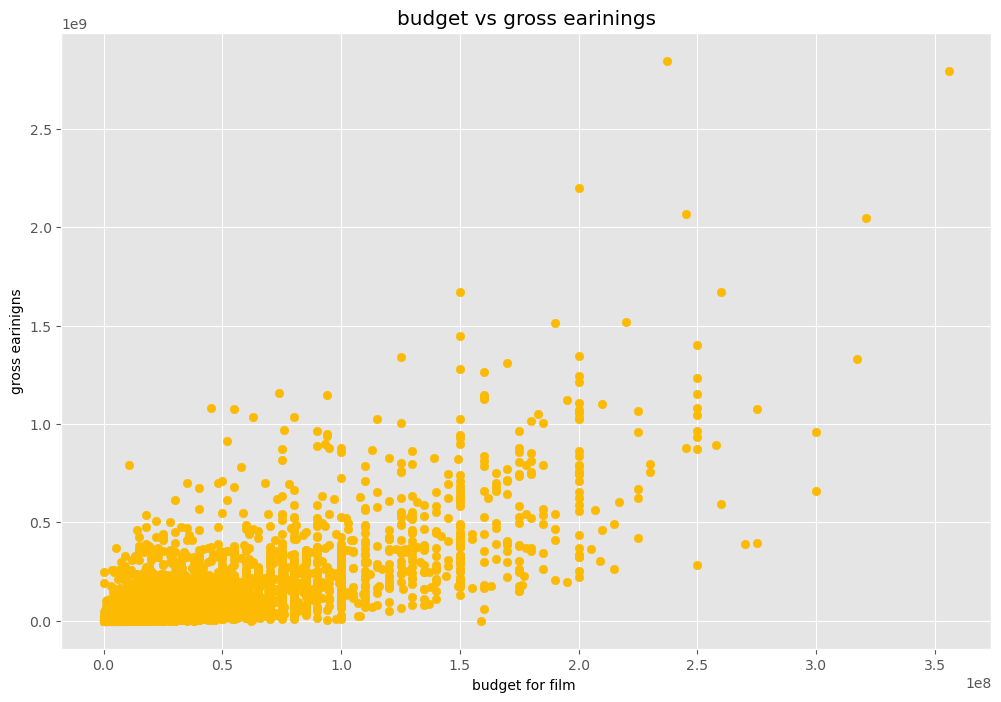

In [13]:
#budget high correlation
#company high correlation
#scatter plot with budget vs gross

plt.scatter(
    x=df['budget'], 
    y= df['gross'],
    color='#fcba03')

plt.title('budget vs gross earinings')
plt.xlabel('budget for film ')
plt.ylabel('gross earinigns')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

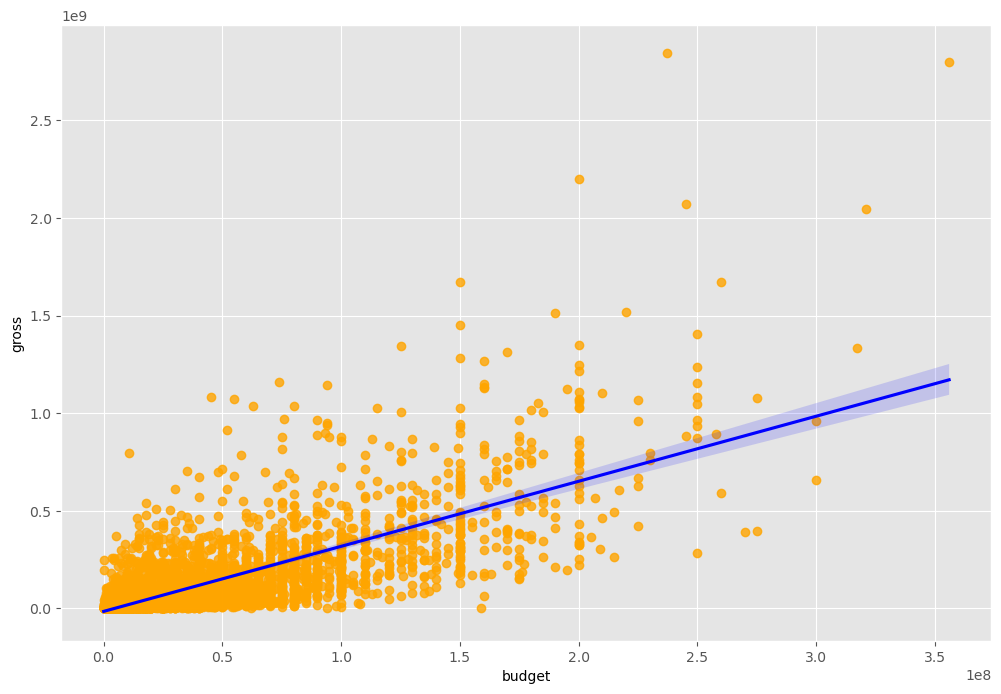

In [14]:
#plot => budget vs gross using seaborn

sns.regplot(
    x='budget',
    y='gross',
    data= df, 
    scatter_kws ={"color": "orange"}, 
    line_kws={"color": "blue"})

<Axes: xlabel='score', ylabel='gross'>

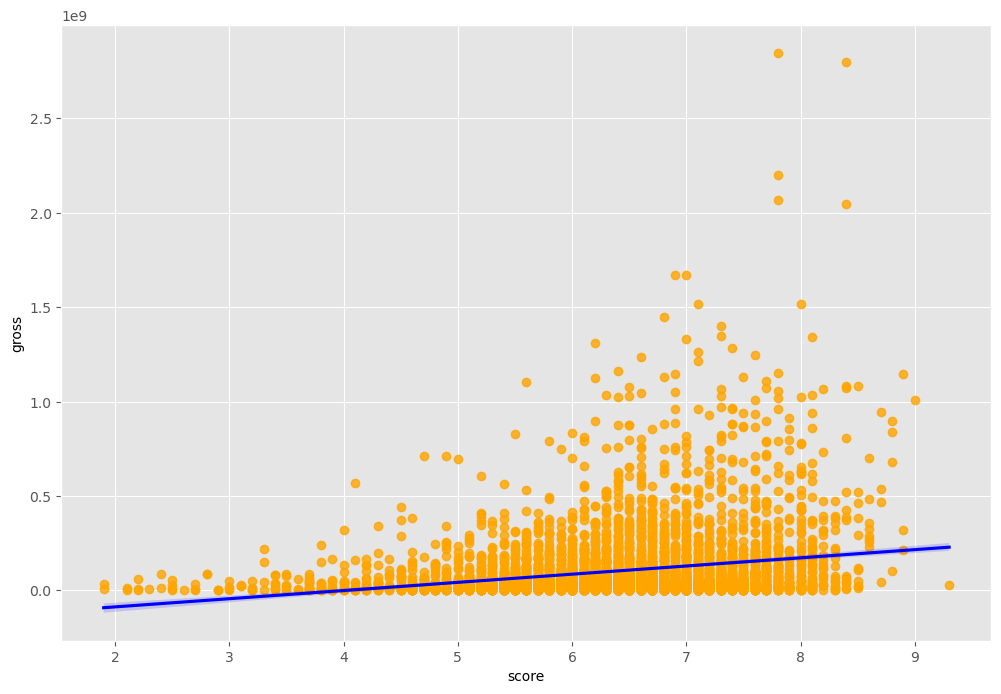

In [15]:
sns.regplot(
    x="score", 
    y="gross", 
    data=df,
    scatter_kws ={"color": "orange"}, 
    line_kws={"color": "blue"})

In [16]:
#looking at correlation between all numeric columns

print("pearson method")

df.corr(numeric_only = True,method='pearson')

pearson method


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [17]:
print("kendall method")

df.corr(numeric_only = True, method='kendall')

kendall method


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [18]:
print("spearman method")

df.corr(numeric_only = True,method='spearman')

spearman method


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


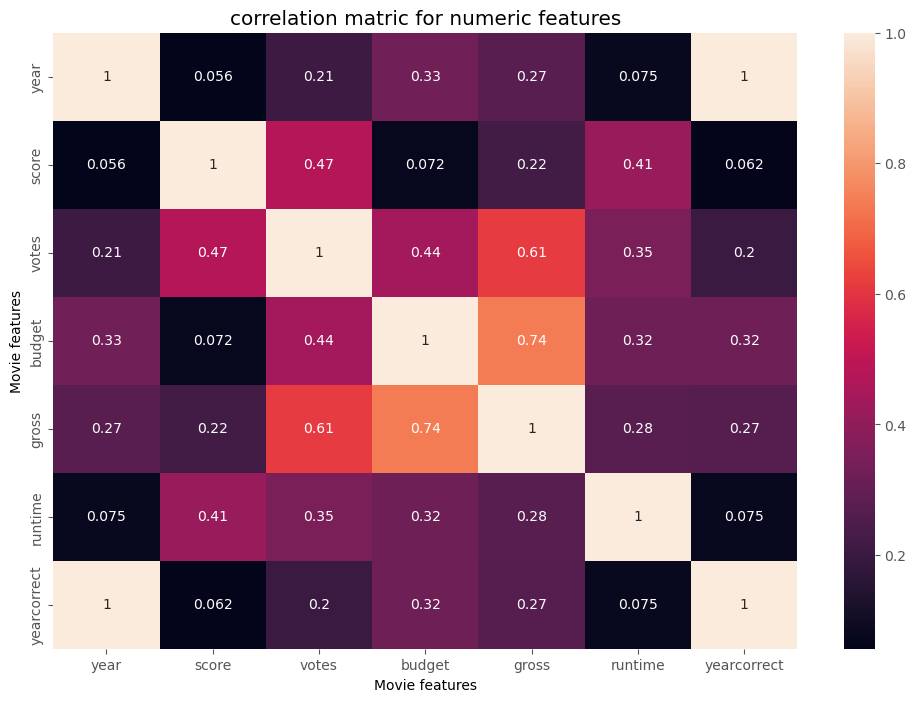

In [19]:


correlation_matrix = df.corr(numeric_only = True, method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [20]:
# Using factorize - this assigns a random numeric value 
# for each unique categorical value
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980,0.921688
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265,0.169681
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056,0.031669
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864,0.950610
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650,0.945065
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831,-0.012946
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362,0.316065
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918,0.708189
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123,0.779672
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297,0.684736


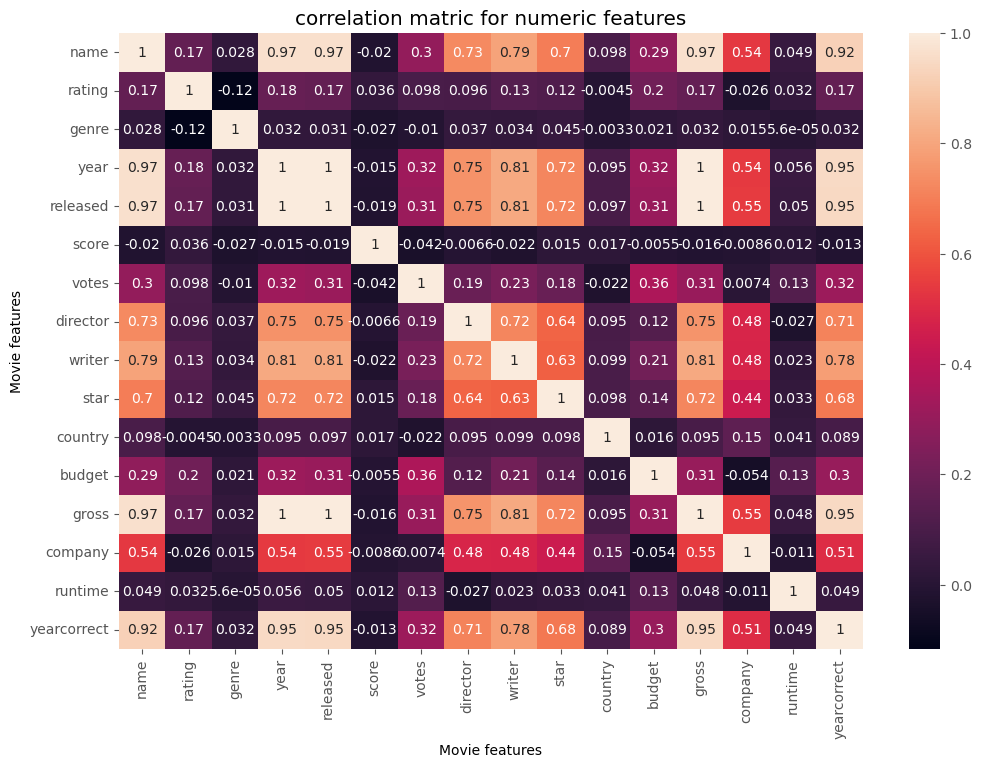

In [21]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [22]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pair = correlation_mat.unstack()
print(corr_pair)

name         name           1.000000
             rating         0.169808
             genre          0.028413
             year           0.965461
             released       0.966086
             score         -0.020083
             votes          0.297305
             director       0.725411
             writer         0.791872
             star           0.695124
             country        0.098110
             budget         0.288955
             gross          0.967925
             company        0.535369
             runtime        0.048980
             yearcorrect    0.921688
rating       name           0.169808
             rating         1.000000
             genre         -0.116507
             year           0.179456
             released       0.171063
             score          0.036114
             votes          0.097619
             director       0.096014
             writer         0.128909
             star           0.115694
             country       -0.004547
 

In [23]:
sorted_pairs= corr_pair.sort_values(kind="quicksort")
print(sorted_pairs)

genre        rating        -0.116507
rating       genre         -0.116507
budget       company       -0.053573
company      budget        -0.053573
score        votes         -0.041981
votes        score         -0.041981
genre        score         -0.027402
score        genre         -0.027402
director     runtime       -0.026918
runtime      director      -0.026918
rating       company       -0.026286
company      rating        -0.026286
country      votes         -0.021562
votes        country       -0.021562
score        writer        -0.021538
writer       score         -0.021538
name         score         -0.020083
score        name          -0.020083
released     score         -0.019486
score        released      -0.019486
             gross         -0.015744
gross        score         -0.015744
score        year          -0.014594
year         score         -0.014594
score        yearcorrect   -0.012946
yearcorrect  score         -0.012946
company      runtime       -0.010695
r

In [85]:
# look at the ones that have a high correlation (> 0.5)
#summary: Votes and budget have the highest correlation to gross (earnings)

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

yearcorrect  company        0.506753
company      yearcorrect    0.506753
             name           0.535369
name         company        0.535369
company      year           0.537731
year         company        0.537731
company      gross          0.545924
gross        company        0.545924
released     company        0.546033
company      released       0.546033
star         writer         0.626647
writer       star           0.626647
star         director       0.636705
director     star           0.636705
yearcorrect  star           0.684736
star         yearcorrect    0.684736
             name           0.695124
name         star           0.695124
director     yearcorrect    0.708189
yearcorrect  director       0.708189
writer       director       0.717990
director     writer         0.717990
year         star           0.719373
star         year           0.719373
released     star           0.720076
star         released       0.720076
gross        star           0.720811
s

In [24]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted



company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [25]:
# Final result: a DataFrame containing the top 15 company names, years, and their corresponding total gross sums,
# sorted in descending order based on gross sums, company names, and years
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [26]:
#looks at company
# string type
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.add_categories(['missing'])
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


C:\Users\hmllb\AppData\Local\Temp\ipykernel_5332\3349934113.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="rating", y="gross", data=df,palette="Set2")


<Axes: xlabel='rating', ylabel='gross'>

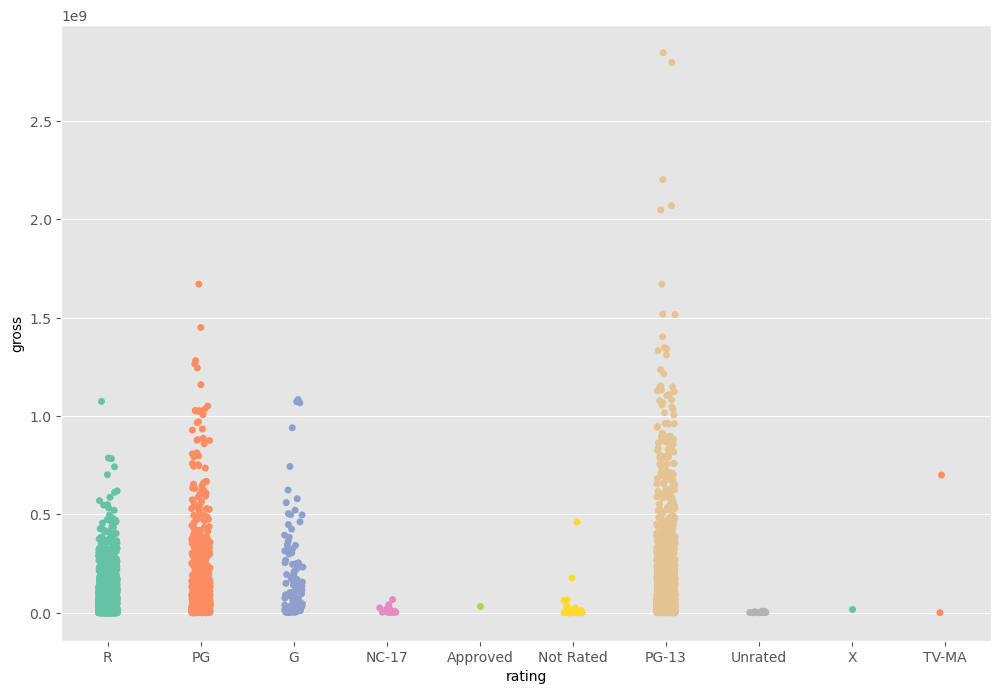

In [37]:
sns.stripplot(x="rating", y="gross", data=df,palette="Set2")